# Nama = `Ahmad Hamdani`
# Nim = `233307092`
# Kelas = `4D`

### 1. Import Library
Import library yang dibutuhkan untuk preprocessing, modeling, evaluasi, dan visualisasi.


1. train_test_split:
  - Memisahkan data menjadi set latih dan uji

2. StandardScaler & OneHotEncoder:
  - Normalisasi fitur numerik
  - Encoding fitur kategorikal

3. ColumnTransformer & Pipeline:
  - Menggabungkan tahapan preprocessing dan model

4. SVR (Support Vector Regression):
  - Model untuk prediksi nilai kontinu

5. mean_absolute_error & r2_score:
  - Metrik evaluasi model

6. matplotlib.pyplot & pandas:
  - Visualisasi dan manipulasi data


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

### 2. Membaca Data CSV
Dataset yang digunakan adalah data popularitas karakter Disney Princess yang tersimpan dalam file CSV "disney_princess_popularity_dataset_300_rows.csv". Dan akan dibaca menggunakan fungsi `read_csv()` dari library pandas dan disimpan ke dalam DataFrame dengan nama `df`. DataFrame ini akan menjadi dasar untuk analisis dan pemodelan yang akan dilakukan.

In [2]:
df = pd.read_csv("data/regresi_2_disney_princess_popularity_dataset_300_rows.csv")

### 3. Menentukan Fitur dan Target
Pada bagian ini, kita memisahkan data menjadi variabel fitur (X) dan target (y) untuk pelatihan model. Fitur-fitur yang digunakan adalah:

- `FirstMovieYear`: Tahun rilis film pertama karakter
- `MovieRuntimeMinutes`: Durasi film dalam menit  
- `BoxOfficeMillions`: Pendapatan box office dalam juta dolar
- `HairColor`: Warna rambut karakter
- `HasSoloSong`: Ada tidaknya lagu solo yang dinyanyikan karakter

Sedangkan target prediksi adalah `PopularityScore` yang menunjukkan tingkat popularitas karakter Disney Princess dalam skala 0-100. Pemisahan ini diperlukan agar model dapat mempelajari hubungan antara fitur-fitur tersebut dengan skor popularitas.

In [3]:
features = ['FirstMovieYear', 'MovieRuntimeMinutes', 'BoxOfficeMillions', 'HairColor', 'HasSoloSong']
target = 'PopularityScore'
X = df[features]
y = df[target]

### 4. Menentukan Jenis Kolom
Variabel numeric_features dan categorical_features digunakan untuk memisahkan kolom-kolom dalam dataset berdasarkan jenis datanya.

numeric_features: Berisi daftar nama kolom yang memiliki nilai numerik, yaitu:

Fitur Numerik:
- FirstMovieYear: Tahun rilis film pertama (angka)
- MovieRuntimeMinutes: Durasi film dalam menit (angka)  
- BoxOfficeMillions: Pendapatan box office dalam juta dollar (angka)

categorical_features: Berisi daftar nama kolom yang memiliki nilai kategorikal, yaitu:
- HairColor: Warna rambut karakter (teks)
- HasSoloSong: Ada/tidaknya lagu solo (Ya/Tidak)

Pemilahan ini penting untuk proses preprocessing, karena kolom numerik akan dinormalisasi menggunakan StandardScaler, sedangkan kolom kategorikal akan di-encode menggunakan OneHotEncoder. Hal ini memastikan setiap jenis data diproses dengan metode yang sesuai sebelum digunakan dalam model.

In [4]:
numeric_features = ['FirstMovieYear', 'MovieRuntimeMinutes', 'BoxOfficeMillions']
categorical_features = ['HairColor', 'HasSoloSong']

### 5. Membuat Pipeline Preprocessing
Variabel preprocessor adalah sebuah objek ColumnTransformer yang digunakan untuk menerapkan transformasi berbeda pada kolom numerik dan kategorikal dalam dataset. Transformasi ini bertujuan untuk mempersiapkan data sebelum dimasukkan ke dalam model.

Menggunakan `StandardScaler` untuk kolom numerik dan `OneHotEncoder` untuk kolom kategorikal.

In [5]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

### 6. Membuat Pipeline SVR
Variabel svr_pipeline adalah pipeline yang menggabungkan preprocessing data dan pelatihan model SVR (Support Vector Regression). Langkah pertama, preprocessor, menggunakan ColumnTransformer untuk menormalisasi fitur numerik dengan StandardScaler dan meng-encode fitur kategorikal dengan OneHotEncoder. Langkah kedua, regressor, menggunakan model SVR dengan kernel RBF untuk menangkap pola non-linear. Pipeline ini memastikan alur preprocessing dan pelatihan dilakukan secara konsisten.

In [6]:
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])

### 7. Membagi Dataset
Baris kode ini menggunakan fungsi train_test_split dari sklearn untuk membagi dataset menjadi data latih dan data uji. Variabel X berisi fitur, sedangkan y berisi target. Parameter test_size=0.2 menunjukkan bahwa 20% data digunakan untuk pengujian (X_test, y_test), dan sisanya 80% untuk pelatihan (X_train, y_train). Parameter random_state=42 memastikan pembagian data dilakukan secara konsisten sehingga hasilnya dapat direproduksi. Pembagian ini penting untuk mengevaluasi performa model secara adil.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 8. Melatih Model
Latih model SVR menggunakan data pelatihan.<br>
Melatih pipeline: data fitur X_train akan diproses terlebih dahulu (scaling + encoding), lalu dipelajari oleh model SVR.

In [8]:
svr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['FirstMovieYear',
                                                   'MovieRuntimeMinutes',
                                                   'BoxOfficeMillions']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['HairColor',
                                                   'HasSoloSong'])])),
                ('regressor', SVR())])

### 9. Prediksi
Menghasilkan prediksi skor popularitas dari data uji setelah melalui preprocessing.

In [9]:
y_pred = svr_pipeline.predict(X_test)

### 10. Evaluasi Model
Hitung nilai MAE dan R² sebagai metrik evaluasi kinerja model.<br>
Mean Absolute Error (MAE): Mengukur rata-rata kesalahan absolut antara nilai prediksi dan aktual.<br>
R² Score: Menjelaskan proporsi variasi dalam target yang dapat dijelaskan oleh model.

In [10]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae, r2

(13.507655136674483, -0.16269569816797214)

Nilai MAE yang tinggi menjadi indikasi kesalahan prediksi rata-rata yang cukup besar, sedangkan nila skor R² negatif mengindikasikan bahwa model tidak mampu menjelaskan variasi data.

### 11. Visualisasi Hasil
Tampilkan grafik scatter antara nilai asli dan nilai prediksi.

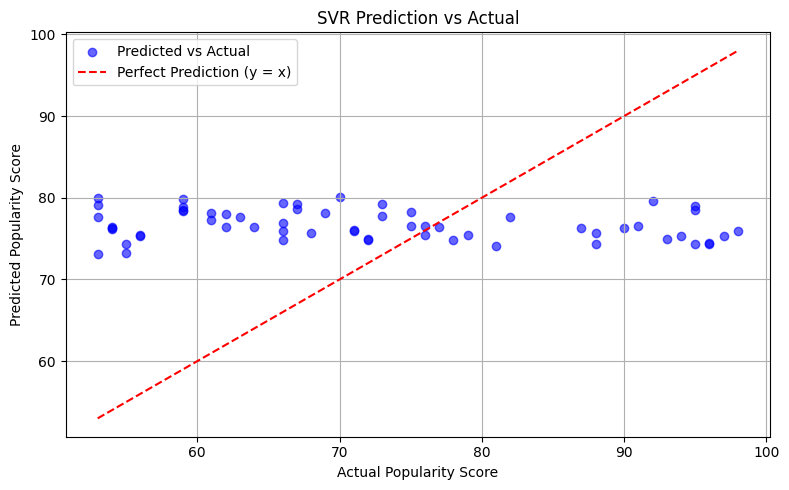

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Buat figure
plt.figure(figsize=(8, 5))

# Scatter plot antara nilai aktual dan prediksi
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Tambahkan garis referensi y = x
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction (y = x)')

# Label dan tampilan
plt.xlabel('Actual Popularity Score')
plt.ylabel('Predicted Popularity Score')
plt.title('SVR Prediction vs Actual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Hampir semua prediksi model berkumpul di rentang 75–80, padahal nilai aktual (X) bervariasi antara 50 sampai 100.<br>
Artinya:<br>
Model SVR kesulitan menangkap variasi skor popularitas yang lebih tinggi dan lebih rendah sehingga dapat disebut underfitting.


### Kesimpulan
Dari grafik ini terlihat bahwa model SVR cenderung memprediksi nilai yang mendekati rata-rata. Hal ini menyebabkan prediksi pada skor yang sangat tinggi atau rendah menjadi kurang akurat, terlihat dari bagaimana titik-titik menjauhi garis y = x. Ini adalah indikasi bahwa model mengalami underfitting terhadap data.


